## Project 2. Legal basis for divorce in the USA 

I picked the dataset that lists the legal basis of divorce that are available in each US state (http://vlado.fmf.uni-lj.si/pub/networks/data/2mode/divorce.net). The nine legal bases are: incompatability, cruelty, desertion, nonsupport, alcohol, felony, impotence, insanity, and separation. 

Divorce is the legal termination of a marriage. The nine legal bases are: incompatability, cruelty, desertion, nonsupport, alcohol, felony, impotence, insanity, and separation. The network is a bipartite graph consisting of the 50 states in the USA and the nine legal bases for divorce. Each state has edges to the bases allowed for legal divorce.

Let's start with data importing.

In [56]:
#import libraries
import pandas as pd
from pandas.compat import StringIO
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import re
from itertools import combinations 


#import data from dat file using StringIO library

temp=u"""
1 1 1 1 1 1 1 1 1
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 1 1 1 1 1 1 1 1
1 0 0 0 0 0 0 1 0
1 0 0 0 0 0 0 0 0
1 1 1 1 1 1 0 1 1
1 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 1
1 1 1 1 1 1 0 1 1
0 1 1 0 1 1 1 0 0
1 0 0 0 0 1 1 1 0
1 0 0 0 0 0 0 0 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 1
1 1 1 1 1 0 1 1 0
0 1 1 0 0 1 1 1 1
1 1 1 1 1 1 1 0 1
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 1 1 0 1 1 1 1 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 0 0
1 0 0 0 0 0 0 1 1
1 1 1 1 1 1 1 0 0
0 1 1 0 1 1 0 1 1
1 1 1 0 0 0 0 0 0
0 1 1 0 0 1 0 0 1
0 0 0 0 0 0 1 1 1
1 1 1 1 1 1 1 1 0
1 1 1 0 1 1 1 0 1
1 1 1 1 1 1 1 1 0
1 0 0 0 0 0 0 0 0
0 1 1 0 0 1 1 1 0
1 1 1 1 1 1 1 0 1
0 1 1 0 1 0 0 0 1
0 1 1 1 1 1 0 0 0
1 1 1 1 1 1 1 0 0
1 1 1 0 0 1 0 1 1
0 1 1 1 1 1 1 1 0
0 1 1 1 0 1 0 1 1
0 1 0 0 0 1 0 0 1
1 0 0 0 0 0 0 0 1
1 1 1 0 1 1 0 1 1
1 0 0 0 0 0 0 0 1
1 0 0 0 0 0 0 1 1"""

#states
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New.Hampshire","New.Jersey","New.Mexico","New.York","North.Carolina","North.Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode.Island","South.Carolina","South.Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Washington","West.Virginia","Wisconsin","Wyoming"]

#legal bases
legal_bases  = ["incompat","cruelty","desertn","nonsupp","alcohol","felony","impotenc","insanity","separate"] 

#reads data to pandas data frame
df = pd.read_csv(StringIO(temp), 
                 sep = "\s+", 
                 names = legal_bases)


df.set_index(pd.Index(states),inplace = True)

#displays 10 top records
df.head(10)

,incompat,cruelty,desertn,nonsupp,alcohol,felony,impotenc,insanity,separate
Alabama,1,1,1,1,1,1,1,1,1
Alaska,1,1,1,0,1,1,1,1,0
Arizona,1,0,0,0,0,0,0,0,0
Arkansas,0,1,1,1,1,1,1,1,1
California,1,0,0,0,0,0,0,1,0
Colorado,1,0,0,0,0,0,0,0,0
Connecticut,1,1,1,1,1,1,0,1,1
Delaware,1,0,0,0,0,0,0,0,1
Florida,1,0,0,0,0,0,0,1,0
Georgia,1,1,1,0,1,1,1,1,0


The next step is to translate two-mode graph network to one-mode graph network. The firts option is to build weighted graph where nodes represent states while the second approach is to build weighted graph where nodes represent legal bases.

Let's start with building weighted graph which nodes represent states. 

In [57]:
states_common_bases_list=[]

for legal_base in list(df.columns):
    #states that allow a certain legal base (for example, all states that allow divorces due to incompatability)
    states_common_bases =list(df[df.loc[:,legal_base]==1].index)
    #stores lists of states for each legal base
    states_common_bases_list.append(states_common_bases)

df = pd.DataFrame(states_common_bases_list)    
df.set_index(pd.Index(legal_bases),inplace = True)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
incompat,Alabama,Alaska,Arizona,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,Ohio,Oklahoma,Oregon,Rhode.Island,Tennessee,Texas,Washington,West.Virginia,Wisconsin,Wyoming
cruelty,Alabama,Alaska,Arkansas,Connecticut,Georgia,Idaho,Illinois,Kansas,Maine,Maryland,...,Virginia,West.Virginia,None,None,None,None,None,None,None,None
desertn,Alabama,Alaska,Arkansas,Connecticut,Georgia,Idaho,Illinois,Kansas,Maine,Maryland,...,West.Virginia,None,None,None,None,None,None,None,None,None
nonsupp,Alabama,Arkansas,Connecticut,Idaho,Maine,Massachusetts,New.Hampshire,North.Dakota,Oklahoma,Rhode.Island,...,None,None,None,None,None,None,None,None,None,None
alcohol,Alabama,Alaska,Arkansas,Connecticut,Georgia,Idaho,Illinois,Kansas,Maine,Massachusetts,...,None,None,None,None,None,None,None,None,None,None
felony,Alabama,Alaska,Arkansas,Connecticut,Georgia,Idaho,Illinois,Indiana,Kansas,Louisiana,...,West.Virginia,None,None,None,None,None,None,None,None,None
impotenc,Alabama,Alaska,Arkansas,Georgia,Illinois,Indiana,Kansas,Maine,Maryland,Massachusetts,...,None,None,None,None,None,None,None,None,None,None
insanity,Alabama,Alaska,Arkansas,California,Connecticut,Florida,Georgia,Idaho,Indiana,Kansas,...,None,None,None,None,None,None,None,None,None,None
separate,Alabama,Arkansas,Connecticut,Delaware,Hawaii,Idaho,Louisiana,Maryland,Massachusetts,Nevada,...,None,None,None,None,None,None,None,None,None,None


In [58]:
#finds all combinations of two states (that represent graph's edges)
 
states_common_bases_pairs_list=[]
for states_set in states_common_bases_list: 
    states_pairs = list(combinations(states_set, 2))
    states_common_bases_pairs_list += states_pairs

#stores graph edges
edges = pd.DataFrame(states_common_bases_pairs_list,columns=['state 1','state 2'])
edges.head(10)

#calculates edges weights
weights = edges.groupby(['state 1','state 2']).size().reset_index()
weights.columns = ['state 1','state 2','weight']

weights.sort_values('weight', ascending=False).head(15)

,state 1,state 2,weight
704,Massachusetts,Rhode.Island,8
2,Alabama,Arkansas,8
32,Alabama,North.Dakota,8
5,Alabama,Connecticut,8
34,Alabama,Oklahoma,8
243,Connecticut,Idaho,8
10,Alabama,Idaho,8
936,North.Dakota,Oklahoma,8
19,Alabama,Massachusetts,8
37,Alabama,Rhode.Island,8


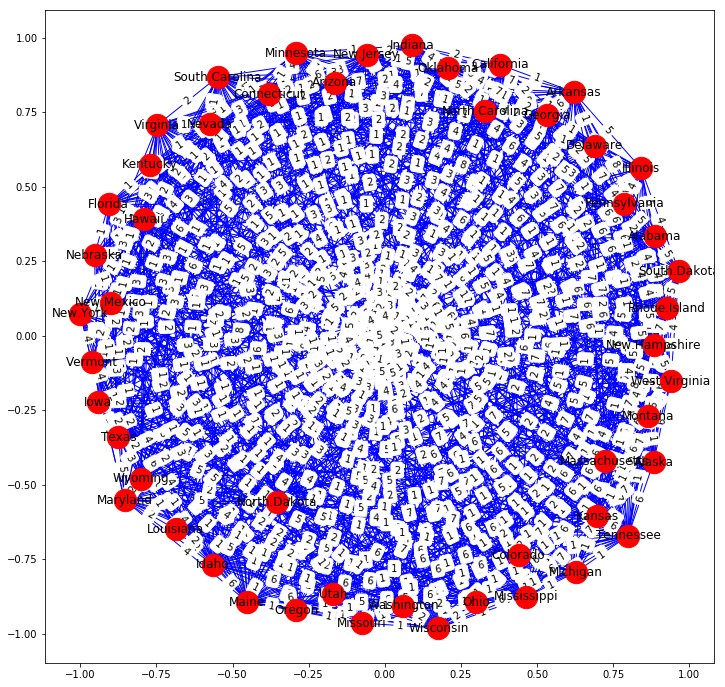

In [59]:
#creates empty graph
G = nx.Graph()

#adds nodes with the node attribute "bipartite"
G.add_nodes_from(states)

edges = weights[['state 1','state 2','weight']].values.tolist()
#adds edges
i=0
for item in edges:
    G.add_edge(item[0],item[1],weight=item[2])

#select layout
pos = nx.spring_layout(G,k=10)

#adjust size of th graph
plt.figure(figsize = (12,12))

#pos=nx.get_node_attributes(G,'pos')      
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'r', node_size = 500)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#display graph
plt.show()

In [60]:
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata)
    return g2

def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [61]:
islands=island_method(G)
for i in islands:
# print the threshold level, size of the graph, and number of connected components
  print (i[0], len(i[1]),len(list(nx.connected_component_subgraphs(i[1]))))

1 40 1
2 33 1
3 28 1
4 25 1
5 22 1
6 18 1
7 8 1


In [62]:
#calculates edge betweenness centrality
edge_betweenness_centrality_values = nx.edge_betweenness_centrality(G)
edge_betweenness_centrality_list =list()
for k,v in edge_betweenness_centrality_values.items():
      edge_betweenness_centrality_list.append(v)
weights['edge betweenness centrality'] = edge_betweenness_centrality_list
weights['edge betweenness centrality']=round(weights['edge betweenness centrality'],5)
weights.sort_values('edge betweenness centrality', ascending=False,inplace=True)
weights.head(20)

,state 1,state 2,weight,edge betweenness centrality
518,Indiana,South.Dakota,1,0.00154
653,Maine,South.Dakota,4,0.00154
477,Illinois,New.Mexico,2,0.00153
576,Kansas,South.Dakota,4,0.00152
39,Alabama,South.Dakota,5,0.00152
706,Massachusetts,South.Dakota,5,0.00152
941,North.Dakota,South.Dakota,5,0.00152
856,New.Hampshire,South.Dakota,5,0.00152
87,Alaska,South.Dakota,4,0.00152
1023,South.Dakota,West.Virginia,4,0.00152
